### 1. Импорт необходимых библиотек

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### 2. Функция для преобразования RGB в XYZ

In [5]:
def rgb_to_xyz(rgb):
    rgb = np.array(rgb) / 255.0  # Преобразуем RGB в диапазон [0, 1]
    # Применяем гамма-коррекцию
    rgb = np.where(rgb > 0.04045, ((rgb + 0.055) / 1.055) ** 2.4, rgb / 12.92)
    rgb = rgb * 100  # Переводим значения в проценты для дальнейших расчетов
    
    # Применяем матрицу преобразования RGB -> XYZ
    xyz = np.dot(rgb, np.array([[0.4124564, 0.3575761, 0.1804375],
                                [0.2126729, 0.7151522, 0.0721750],
                                [0.0193339, 0.1191920, 0.9503041]]))
    return xyz

### 3. Функция для преобразования XYZ в RGB

In [6]:
def xyz_to_rgb(xyz):
    xyz = np.array(xyz) / 100.0  # Приводим значения к диапазону [0, 1]
    # Применяем матрицу преобразования XYZ -> RGB
    rgb = np.dot(xyz, np.array([[ 3.2404542, -1.5371385, -0.4985314],
                                [-0.9692660,  1.8760108,  0.0415560],
                                [ 0.0556434, -0.2040259,  1.0572252]]))
    
    # Применяем обратную гамма-коррекцию
    rgb = np.where(rgb > 0.0031308, 1.055 * (rgb ** (1.0 / 2.4)) - 0.055, 12.92 * rgb)
    rgb = np.clip(rgb * 255.0, 0, 255)  # Ограничиваем значения в диапазоне [0, 255]
    return np.uint8(rgb)

### 4. Загрузка изображения и проверка на ошибки

In [7]:
image = cv2.imread('photo.jpeg')
if image is None:
    raise FileNotFoundError("Изображение не удалось загрузить. Убедитесь, что путь указан правильно.")

### 5. Преобразование изображения из BGR в XYZ и обратно в BGR

In [8]:
xyz_image = np.zeros_like(image, dtype=float)  # Пустой массив для XYZ
rgb_converted_image = np.zeros_like(image, dtype=np.uint8)  # Пустой массив для преобразованного изображения
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        # Преобразуем пиксель из BGR в XYZ
        bgr_pixel = image[i, j]
        rgb_pixel = bgr_pixel[::-1]  # Меняем порядок, так как OpenCV использует BGR, а не RGB
        xyz_image[i, j] = rgb_to_xyz(rgb_pixel)
        
        # Преобразуем обратно из XYZ в RGB, затем меняем обратно в BGR
        rgb_converted_image[i, j] = xyz_to_rgb(xyz_image[i, j])[::-1]

### 6. Преобразование изображения в HSV и обратно в BGR

In [9]:
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)  # Преобразуем изображение в HSV
bgr_from_hsv = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)  # Преобразуем обратно в BGR

### 7. Преобразование изображения в Lab и обратно в BGR

In [10]:
lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)  # Преобразуем изображение в Lab
bgr_from_lab = cv2.cvtColor(lab_image, cv2.COLOR_Lab2BGR)  # Преобразуем обратно в BGR

### 8. Разделение изображения на каналы (RGB, HSV, Lab, XYZ)

In [11]:
# Разделение на каналы B, G, R
B, G, R = cv2.split(image)

# Разделение на каналы HSV
H, S, V = cv2.split(hsv_image)

# Разделение на каналы Lab
L, A, B_lab = cv2.split(lab_image)

# Разделение на каналы XYZ
X, Y, Z = cv2.split(xyz_image.astype(np.uint8))


### 9. Функция для отображения изображений

In [12]:
def show_images(titles, images, is_gray=False):
    n = len(images)
    plt.figure(figsize=(20, 10))
    for i in range(n):
        plt.subplot(1, n, i+1)
        if is_gray:
            plt.imshow(images[i], cmap='gray')
        else:
            plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

### 10. Отображение различных изображений и каналов

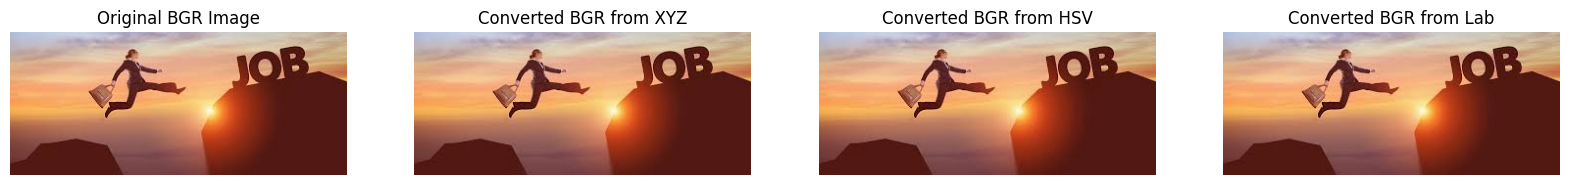

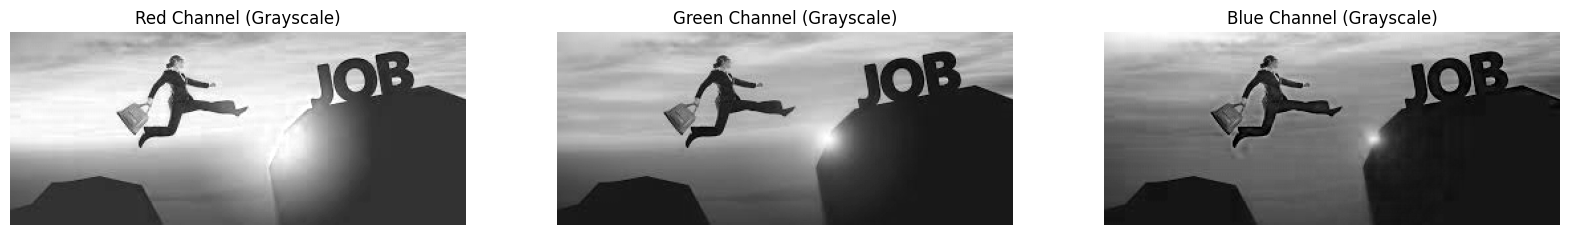

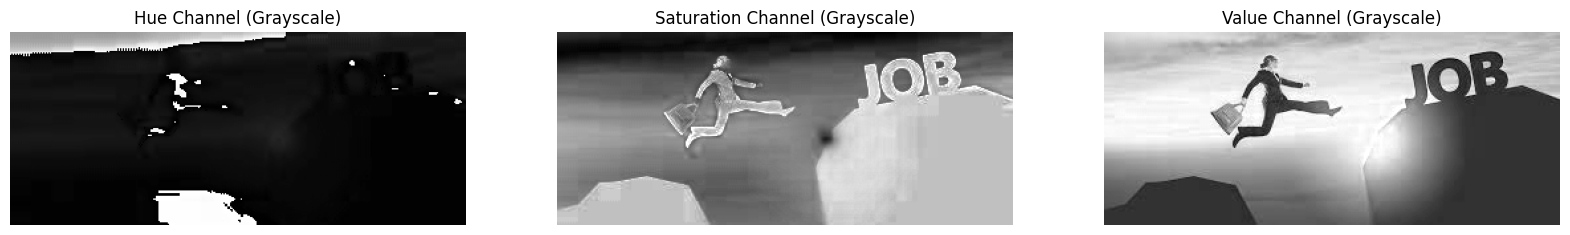

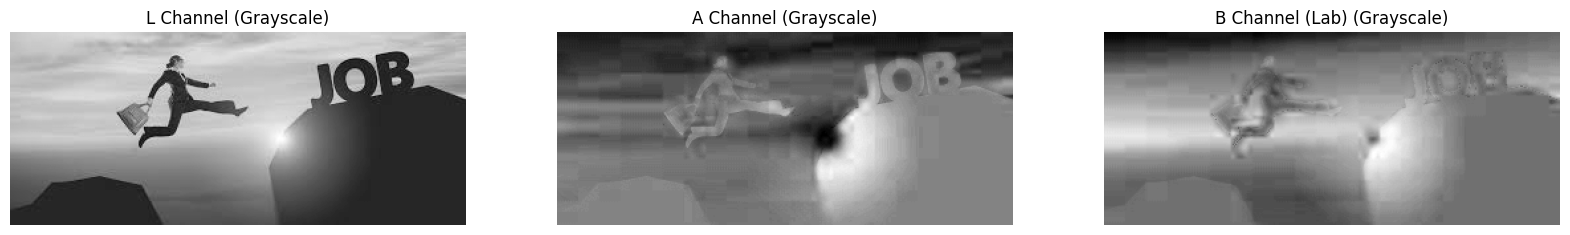

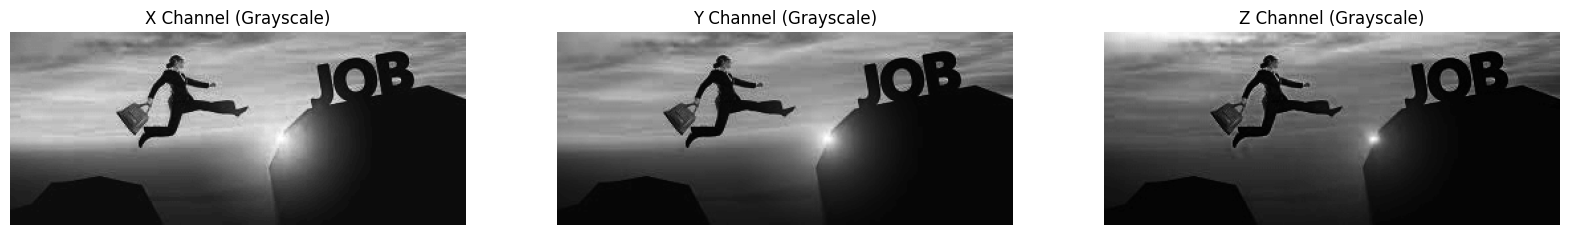

In [13]:
# Отображение всех изображений и компонент
show_images(['Original BGR Image', 'Converted BGR from XYZ', 'Converted BGR from HSV', 'Converted BGR from Lab'], 
            [image, rgb_converted_image, bgr_from_hsv, bgr_from_lab])

# Отображение компонент RGB в виде отдельных каналов (серый)
show_images(['Red Channel (Grayscale)', 'Green Channel (Grayscale)', 'Blue Channel (Grayscale)'], [R, G, B], is_gray=True)

# Отображение компонент HSV в виде отдельных каналов (серый)
show_images(['Hue Channel (Grayscale)', 'Saturation Channel (Grayscale)', 'Value Channel (Grayscale)'], [H, S, V], is_gray=True)

# Отображение компонент Lab в виде отдельных каналов (серый)
show_images(['L Channel (Grayscale)', 'A Channel (Grayscale)', 'B Channel (Lab) (Grayscale)'], [L, A, B_lab], is_gray=True)

# Отображение компонент XYZ в виде отдельных каналов (серый)
show_images(['X Channel (Grayscale)', 'Y Channel (Grayscale)', 'Z Channel (Grayscale)'], [X, Y, Z], is_gray=True)